In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

# Initialize the Sequential model
model = Sequential()

# Convolutional input layer with 32 feature maps, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))


# Dropout layer at 20%
model.add(Dropout(0.2))

# Convolutional layer with 32 feature maps, a 3x3 kernel, and ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Max Pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 64 feature maps, a 3x3 kernel, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Dropout layer at 20%
model.add(Dropout(0.2))

# Convolutional layer with 64 feature maps, a 3x3 kernel, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

# Max Pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer with 128 feature maps, a 3x3 kernel, and ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Dropout layer at 20%
model.add(Dropout(0.2))

# Convolutional layer with 128 feature maps, a 3x3 kernel, and ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Max Pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dropout layer at 20%
model.add(Dropout(0.2))

# Fully connected layer with 1024 units and ReLU activation
model.add(Dense(1024))
model.add(Activation('relu'))

# Dropout layer at 20%
model.add(Dropout(0.2))

# Fully connected layer with 512 units and ReLU activation
model.add(Dense(512))
model.add(Activation('relu'))

# Dropout layer at 20%
model.add(Dropout(0.2))

# Fully connected output layer with 10 units and Softmax activation
model.add(Dense(10))
model.add(Activation('softmax'))


# Compiling model using legacy SGD optimizer
epochs = 25
learning_rate = 0.01
sgd = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

# Fitting the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32, verbose=1)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 dropout_12 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 64)        0         
                                                      

In [14]:
# Predicting the first 4 images of the testing Data
predict_class = model.predict(X_test[:4])

# Converting the predicted classes into labels
predicted_labels = np.argmax(predict_class, axis=1)

# Displaying the Actual labels
actual_labels = np.argmax(y_test[:4], axis=1)

# Comparing the predictions with actual labels
for i in range(4):
    print(f"Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")


1/1 [==============================] - 0s 100ms/step
Predicted: 3, Actual: 3
Predicted: 1, Actual: 8
Predicted: 8, Actual: 8
Predicted: 0, Actual: 0


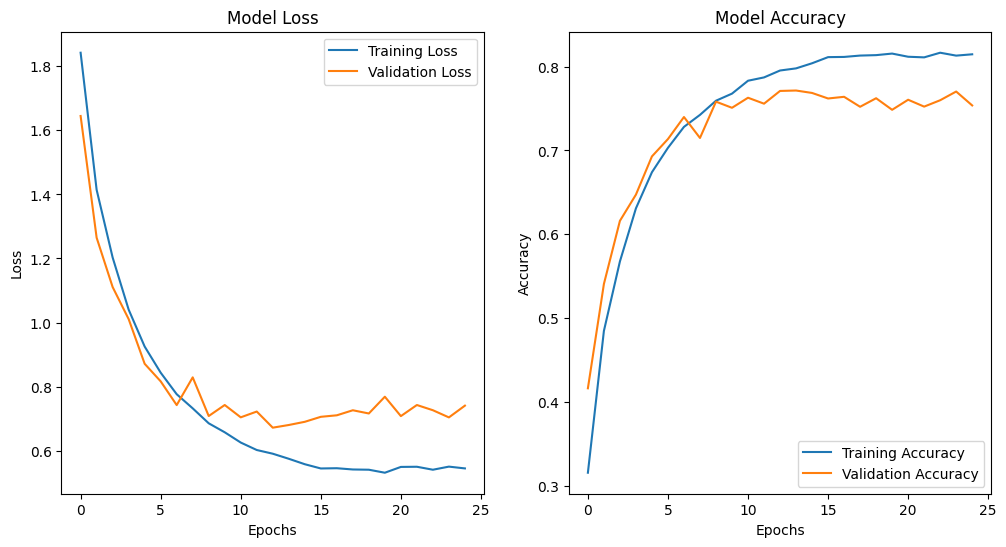

In [16]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()